<a href="https://colab.research.google.com/github/sergiomora03/AdvancedTopicsAnalytics/blob/main/exercises/E9-OpenAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Usando ChatGPT
## Objetivos

El propósito de este taller es que usted interactúe con quizás el LLMs (large language model) más popular en la actualidad: ChatGPT. Para eso vamos a hacer uso del API de OpenAI.


Agradecimientos especiales para [Rubén Manrique](https://github.com/Ruframapi) autor.


## Parte 1. Creación de cuenta

Ingrese a https://openai.com/ en el botón Sign UP, diligencie el formulario y realice la verificación de su email.

Una vez verificado su email, ud debe proporcionar un número de teléfono móvil al cual le llegará un codigo de verificación. Si todo sale bien deberá poder ingresar a una interfaz, donde encontrará en la parte superior derecha una imagen similar a la que se muestra:

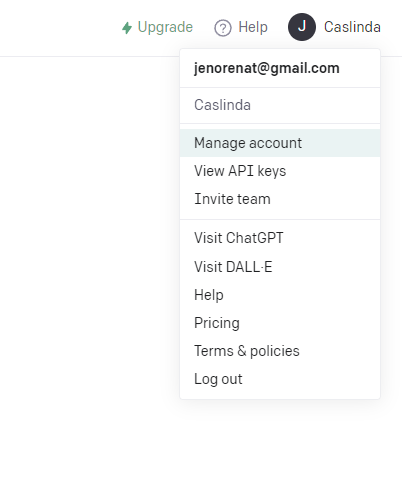

Diríjase a la sección ***Manage Account***. Deberá poder ver los 5 USD de créditos gratuitos que le dieron a su cuenta.

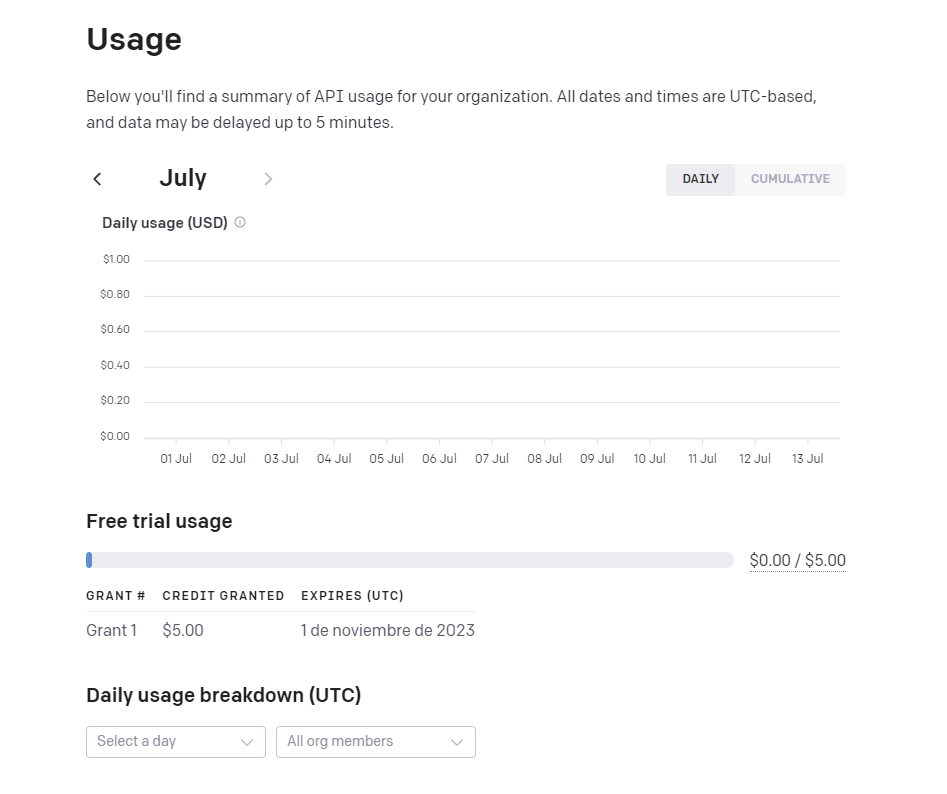

Vamos a crear una API key para poder hacer uso de los servicio de openAI. Diríjase a ***View API keys***

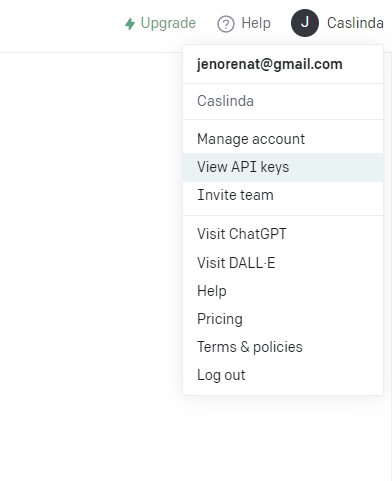

Cree una nueva llave con el nombre que desee. **Nota importante:** Inmediatamente a la creación le va a ser mostrada la llave por una única vez, por favor copiela y guardela en un lugar seguro.

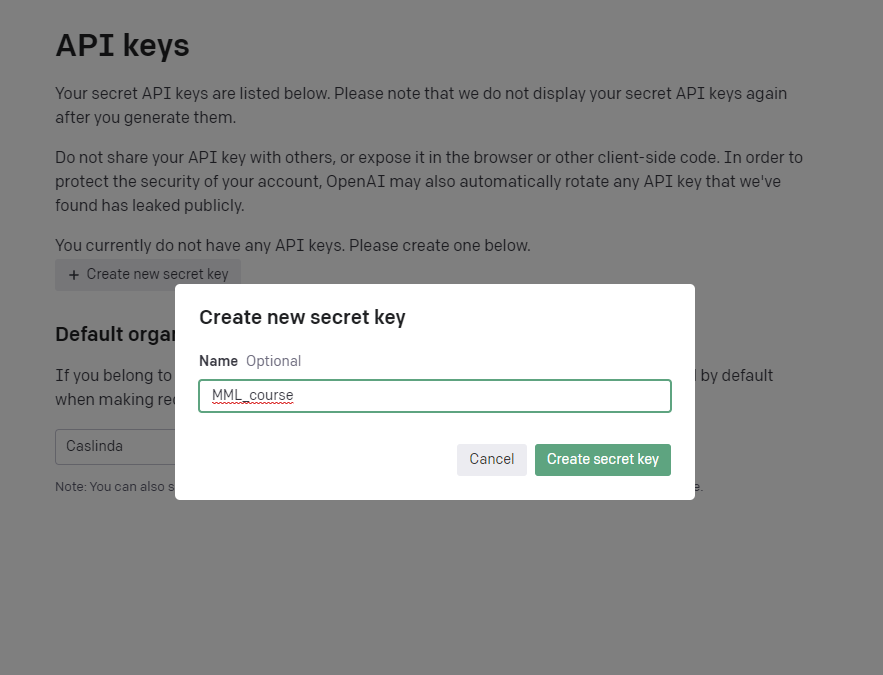

## Instrucciones de Uso de Gemini Pro

Configuración Inicial:

Instalación de Dependencias:
- Bash
- pip install google-generativeai


### Obtención de la Clave API:

Accede a https://aistudio.google.com/app/apikey para generar una nueva clave API.

 ![api](../../../images/api.png)

Configuración del Entorno:
Google Colab: Almacena la clave como un secreto en la sección "Secrets" con el
- nombre GOOGLE_API_KEY.

 ![key](../../../images/key.png)

- Entorno Local: Crea un archivo (.env) y establece la variable GOOGLE_API_KEY con el valor obtenido.

¡Listo para Usar! Con estos pasos, ya puedes empezar a utilizar el modelo de lenguaje Gemini Pro en el notebook actual.

## Notas

1. Se ha seleccionado el modelo de lenguaje Google Gemini Pro, siguiendo la recomendación del profesor.
2. Las salidas precedidas de la etiqueta '<**intento 1 (por consola)**>' corresponden a ejecuciones manuales realizadas a través del chat de GPT en https://chatgpt.com/gpts.

## Parte 2. Interacción básica

In [23]:
# !pip install openai
# !pip install openai-0.28.0
# !pip install python-dotenv

!pip install -q -U google-generativeai

import google.generativeai as genai
from google.colab import userdata   # Para usar los secrets de colab

import textwrap
from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  """
  Convierte texto en formato Markdown de Gemini a un formato compatible con Colab.

  Args:
    text (str): El texto en formato Markdown de Gemini.

  Returns:
    str: El texto convertido en formato Markdown compatible con Colab.
  """

  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

Ahora, copie su API key en la variable `openai.api_key` y entre comillas:

In [2]:
# import os
# import dotenv
# import openai

# dotenv.load_dotenv()
# KEY = os.getenv('KEY')

# openai.api_key  = KEY

## Configuramos nuestra instancia del modelo con nuestra API key
GOOGLE_API_KEY = userdata.get('GOOGLE_API_KEY')
genai.configure(api_key = GOOGLE_API_KEY)

A lo largo de este notebook, utilizaremos el modelo gpt-3.5-turbo de OpenAI y el endpoint de chatcompletion.

Esta función auxiliar facilitará el uso de indicaciones y la visualización de las salidas generadas:

In [3]:
# def get_completion(prompt, model="gpt-3.5-turbo"):
#     messages = [{"role": "user", "content": prompt}]
#     response = openai.ChatCompletion.create(
#         model=model,
#         messages=messages,
#         temperature=0, # this is the degree of randomness of the model's output
#     )
#     return response.choices[0].message["content"]

# Cargar el modelo a usar
model = genai.GenerativeModel('gemini-pro')

### Prompting

Prompting es la forma en que los seres humanos pueden comunicarse con las inteligencias artificiales. Es una manera de decirle a la IA qué queremos y cómo lo queremos, generalmente utilizando palabras. La ingeniería de prompts es la tarea de encontrar la indicación (texto de entrada) que obtiene los mejores resultados de la IA.


## Estrategias básicas para Prompting
- Escribir instrucciones claras
- Use delimitadores para indicar claramente las distintas partes de la entrada. Los delimitadores pueden ser: ```, """, < >, `<tag> </tag>`, `:`


In [ ]:
# ##Consideremos el ejercicio de resumir un texto de entrada

# text = f"""
# El aprendizaje automático (AA) o aprendizaje automatizado o aprendizaje \
# de máquinas o aprendizaje computacional (del inglés, machine learning) \
# es el subcampo de las ciencias de la computación y una rama de la inteligencia artificial, \
# cuyo objetivo es desarrollar técnicas que permitan que las computadoras aprendan. \
# Se dice que un agente aprende cuando su desempeño mejora con la experiencia y mediante el uso de datos; \
# es decir, cuando la habilidad no estaba presente en su genotipo o rasgos de nacimiento. \
# En el aprendizaje de máquinas un computador observa datos,  \
# construye un modelo basado en esos datos y utiliza ese modelo a la vez como \
# una hipótesis acerca del mundo y una pieza de software que puede resolver problemas. \
# """
# prompt = f"""
# Resume el texto delimitado por triple backticks en una sola oración.
# ```{text}```
# """
# response = get_completion(prompt)
# print(response)

In [4]:
#####################################################
############### Usando Gemini pro ###################
#####################################################

text = f"""
El aprendizaje automático (AA) o aprendizaje automatizado o aprendizaje \
de máquinas o aprendizaje computacional (del inglés, machine learning) \
es el subcampo de las ciencias de la computación y una rama de la inteligencia artificial, \
cuyo objetivo es desarrollar técnicas que permitan que las computadoras aprendan. \
Se dice que un agente aprende cuando su desempeño mejora con la experiencia y mediante el uso de datos; \
es decir, cuando la habilidad no estaba presente en su genotipo o rasgos de nacimiento. \
En el aprendizaje de máquinas un computador observa datos,  \
construye un modelo basado en esos datos y utiliza ese modelo a la vez como \
una hipótesis acerca del mundo y una pieza de software que puede resolver problemas. \
"""
prompt = f"""
Resume el texto delimitado por triple backticks en una sola oración.
```{text}```
"""

response = model.generate_content(prompt)
to_markdown(response.text)

> El aprendizaje automático es un campo de la informática que permite que las computadoras aprendan mediante el análisis de datos, creando modelos que les permiten resolver problemas y mejorar su rendimiento con la experiencia.

### Salida de GPT

- El aprendizaje automático es un campo de la inteligencia artificial que busca desarrollar sistemas capaces de aprender a partir de datos, mejorando su desempeño a través de la experiencia, sin necesidad de ser programados explícitamente para cada tarea.

Los prompts pueden ser tan sofisticados como uno quiera; sin embargo, entre más sofisiticados, se deben escribir con mayor claridad. Una buena estrategia para construir prompts de calidad en tareas complejas es descomponer la tarea en tareas más pequeñas y ordenadas. Veamos un ejemplo:

In [ ]:
# text = f"""
# A lo largo del día, y luego de conocerse el fallo donde la Corte Internacional de Justicia (CIJ) rechazó la petición de Nicaragua de extender su plataforma continental más allá de 200 millas náuticas desde su costa, reaccionaron todos los expresidentes vivos de Colombia.\
# Nicaragua no tiene derecho a una línea extendida dentro de las 200 millas de la línea base de Colombia. Dentro de la línea base de las millas náuticas de San Andrés y Providencia, Nicaragua no tiene derechos a una plataforma extendida, leyó Joan Donoghue, presidenta de la Corte de La Haya.\
# Es de recordar que Colombia y Nicaragua son viejos conocidos en la disputa por el mar. En total, a la Corte Internacional de Justicia (CIJ) han llegado tres demandas y en dos de esas Colombia no salió tan bien librado, pues ya ha perdido parte de sus aguas con el país centroamericano. Eso sí, hay que resaltar que sigue con la plena jurisdicción de las islas de San Andrés y Providencia.\
# Iván Duque: Colombia ha defendido su soberanía a pesar de haberse retirado de la competencia de la CIJ, luego de su injusto fallo de 2012. Quiero felicitar a Manuel José Cepeda, Carlos Gustavo Arrieta, al equipo de la Cancillería y la Armada Nacional; al igual que a los asesores del equipo de Defensa, que desvirtuaron los argumentos de Nicaragua en su absurda pretensión de Plataforma Continental Extendida.\
# Juan Manuel Santos: Gran triunfo de Colombia. Felicitaciones a la Canciller Holguín y a todos los que hicieron posible este gran logro diplomático jurídico en La Haya para nuestro país. Se cierra un capítulo luego de 10 años de litigio que sumados a los otros once del primer proceso de Nicaragua contra Colombia por la soberanía territorial y delimitación marítima, concluyen más de dos décadas de pleitos judiciales entre los dos países.\
# """

# prompt = f"""
# Realice las siguientes acciones:
# 1 - Resume el siguiente texto delimitado por triple backticks en 1 oración.
# 2 - Traducir el resumen al francés.
# 3 - Enumere cada nombres de organziaciones o paises presentes en el resumen en francés.
# 4 - Muestra un objeto json que contiene lo siguiente \
# keys: french_summary, num_names.

# Text:
# ```{text}```
# """
# response = get_completion(prompt)
# print(response)


In [5]:
#####################################################
############### Usando Gemini pro ###################
#####################################################

text = f"""
A lo largo del día, y luego de conocerse el fallo donde la Corte Internacional de Justicia (CIJ) rechazó la petición de Nicaragua de extender su plataforma continental más allá de 200 millas náuticas desde su costa, reaccionaron todos los expresidentes vivos de Colombia.\
Nicaragua no tiene derecho a una línea extendida dentro de las 200 millas de la línea base de Colombia. Dentro de la línea base de las millas náuticas de San Andrés y Providencia, Nicaragua no tiene derechos a una plataforma extendida, leyó Joan Donoghue, presidenta de la Corte de La Haya.\
Es de recordar que Colombia y Nicaragua son viejos conocidos en la disputa por el mar. En total, a la Corte Internacional de Justicia (CIJ) han llegado tres demandas y en dos de esas Colombia no salió tan bien librado, pues ya ha perdido parte de sus aguas con el país centroamericano. Eso sí, hay que resaltar que sigue con la plena jurisdicción de las islas de San Andrés y Providencia.\
Iván Duque: Colombia ha defendido su soberanía a pesar de haberse retirado de la competencia de la CIJ, luego de su injusto fallo de 2012. Quiero felicitar a Manuel José Cepeda, Carlos Gustavo Arrieta, al equipo de la Cancillería y la Armada Nacional; al igual que a los asesores del equipo de Defensa, que desvirtuaron los argumentos de Nicaragua en su absurda pretensión de Plataforma Continental Extendida.\
Juan Manuel Santos: Gran triunfo de Colombia. Felicitaciones a la Canciller Holguín y a todos los que hicieron posible este gran logro diplomático jurídico en La Haya para nuestro país. Se cierra un capítulo luego de 10 años de litigio que sumados a los otros once del primer proceso de Nicaragua contra Colombia por la soberanía territorial y delimitación marítima, concluyen más de dos décadas de pleitos judiciales entre los dos países.\
"""

prompt = f"""
Realice las siguientes acciones:
1 - Resume el siguiente texto delimitado por triple backticks en 1 oración.
2 - Traducir el resumen al francés.
3 - Enumere cada nombres de organziaciones o paises presentes en el resumen en francés.
4 - Muestra un objeto json que contiene lo siguiente \
keys: french_summary, num_names.

Text:
```{text}```
"""
response = model.generate_content(prompt)
to_markdown(response.text)

> **Resumen:** La Corte Internacional de Justicia rechazó la solicitud de Nicaragua de extender su plataforma continental más allá de 200 millas náuticas desde su costa, lo que llevó a los expresidentes colombianos a felicitar al país por defender su soberanía.
> 
> **Traducción al francés:** La Cour internationale de Justice a rejeté la demande du Nicaragua visant à étendre son plateau continental au-delà de 200 milles marins de sa côte, ce qui a amené les anciens présidents colombiens à féliciter le pays pour avoir défendu sa souveraineté.
> 
> **Nombres de organizaciones o países presentes en el resumen en francés:**
> 
> * Cour internationale de Justice (CIJ)
> * Nicaragua
> * Colombie
> * La Haye
> 
> **Objeto JSON:**
> 
> ```
> {
>   "french_summary": "La Cour internationale de Justice a rejeté la demande du Nicaragua visant à étendre son plateau continental au-delà de 200 milles marins de sa côte, ce qui a amené les anciens présidents colombiens à féliciter le pays pour avoir défendu sa souveraineté.",
>   "num_names": 3
> }
> ```

### Numeral A

Escriba un prompt que realice las siguientes operaciones sobre un texto en inglés de máximo un párrafo:
- Lo traduzca a español con tono informal.
- Identifique y liste los verbos en el texto traducido.
- Devuelva un objeto Json con la traducción y la lista de verbos.

In [ ]:
### Usar esta celda para entregar numeral A

# text = f"""
# There are two ways to quickly set up the Hello World app with Render, as an individual web service or as a services blueprint. The blueprint allows you to take advantage of the render.yaml configuration file included in the app source code. Both allow you to test this out for free, however the blueprint method requires adding a credit card to your account.
# """

# prompt = f"""
# Realice las siguientes acciones:
# 1 - Traducir el siguiente texto delimitado por triple backticks con tono informal. \
# 2 - Traducir el resumen al español. \
# 3 - Listar cada verbo presentes en el resumen en español. \
# 4 - Muestra un objeto json que contiene lo siguiente \
# keys: spanish_summary, num_verbs.

# Text:
# ```{text}```
# """
# response = get_completion(prompt)
# print(response)

In [6]:
#####################################################
############### Usando Gemini pro ###################
#####################################################

text = f"""
There are two ways to quickly set up the Hello World app with Render, as an individual web service or as a services blueprint. The blueprint allows you to take advantage of the render.yaml configuration file included in the app source code. Both allow you to test this out for free, however the blueprint method requires adding a credit card to your account.
"""

prompt = f"""
Realice las siguientes acciones:
1 - Traducir el siguiente texto delimitado por triple backticks con tono informal. \
2 - Traducir el resumen al español. \
3 - Listar cada verbo presentes en el resumen en español. \
4 - Muestra un objeto json que contiene lo siguiente \
keys: spanish_summary, num_verbs.

Text:
```{text}```
"""

response = model.generate_content(prompt)
to_markdown(response.text)

> **1. Traducción informal:**
> 
> Hay dos formas de configurar rápidamente la aplicación Hola Mundo con Render: como un servicio web individual o como un proyecto de servicios. El proyecto te permite aprovechar el archivo de configuración render.yaml incluido en el código fuente de la aplicación. Ambas opciones te permiten probarlo gratis, pero el método de proyecto requiere agregar una tarjeta de crédito a tu cuenta.
> 
> **2. Resumen en español:**
> 
> Existen dos opciones para configurar rápidamente la aplicación Hola Mundo con Render: como servicio web individual o como proyecto de servicios. El proyecto permite aprovechar el archivo de configuración render.yaml, incluido en el código fuente de la aplicación. Ambas opciones permiten realizar pruebas gratuitas; sin embargo, el método de proyecto requiere agregar una tarjeta de crédito a la cuenta.
> 
> **3. Verbos en el resumen en español:**
> 
> * existen
> * configurar
> * permite
> * aprovechar
> * permiten
> * realizar
> * requiere
> * agregar
> 
> **4. Objeto JSON:**
> 
> ```
> {
>   "spanish_summary": "Existen dos opciones para configurar rápidamente la aplicación Hola Mundo con Render: como servicio web individual o como proyecto de servicios. El proyecto permite aprovechar el archivo de configuración render.yaml, incluido en el código fuente de la aplicación. Ambas opciones permiten realizar pruebas gratuitas; sin embargo, el método de proyecto requiere agregar una tarjeta de crédito a la cuenta.",
>   "num_verbs": 7
> }
> ```

## Few Shot Learning

Vamos a construir un clasificador por medio de un modelo de lenguaje. Para eso vamos a darle un pequeño conjunto de ejemplos en el prompt. A esta estrategia se le conoce como "few shot".

In [ ]:
#####################################################
############### Usando Gemini pro ###################
#####################################################

## Hagamos un extractor de entidades nombradas, le damos unos pocos ejemplos y la oración de interes al final
# prompt = f"""
# [Texto]: Fred es un emprendedor en serie. Cofundador y director ejecutivo de Platform.sh, anteriormente cofundó Commerce Guys, un proveedor líder de comercio electrónico de Drupal. Su misión es garantizar que mientras continuamos en un viaje ambicioso para transformar profundamente la forma en que se usa y se percibe la computación en la nube, mantenemos los pies bien puestos en el suelo y continuamos con el rápido crecimiento que hemos disfrutado hasta ahora.
# [Nombre]: Fred
# [Puesto]: Co-fundador y CEO
# [Empresa]: Platform.sh
# ###
# [Texto]: Microsoft (la palabra es un acrónimo de "software de microcomputadora") fue fundado por Bill Gates el 4 de abril de 1975 para desarrollar y vender intérpretes BASIC para Altair 8800. Steve Ballmer reemplazó a Gates como director ejecutivo en 2000 y luego imaginó una estrategia de "dispositivos y servicios".
# [Nombre]: Steve Ballmer
# [Puesto]: director general
# [Empresa]: Microsoft
# ###
# [Texto]: Franck Riboud nació el 7 de noviembre de 1955 en Lyon. Es hijo de Antoine Riboud, el anterior director ejecutivo, que transformó al antiguo fabricante de vidrio europeo BSN Group en un actor líder en la industria alimentaria. Es el director general de Danone.
# [Nombre]: Franck Riboud
# [Puesto]: director general
# [Empresa]: Danone
# ###
# [Texto]: David Melvin es un profesional de servicios financieros y de inversión en CITIC CLSA con más de 30 años de experiencia en banca de inversión y capital privado. Actualmente es Consejero Senior de CITIC CLSA
# """
# response = get_completion(prompt)
# print(response)
## Nota: Cobran por el tamaño del prompt, realizar un few-shot learning podría no ser adecuado para tareas complejas.

In [7]:
# Hagamos un extractor de entidades nombradas, le damos unos pocos ejemplos y la oración de interes al final
prompt = f"""
[Texto]: Fred es un emprendedor en serie. Cofundador y director ejecutivo de Platform.sh, anteriormente cofundó Commerce Guys, un proveedor líder de comercio electrónico de Drupal. Su misión es garantizar que mientras continuamos en un viaje ambicioso para transformar profundamente la forma en que se usa y se percibe la computación en la nube, mantenemos los pies bien puestos en el suelo y continuamos con el rápido crecimiento que hemos disfrutado hasta ahora.
[Nombre]: Fred
[Puesto]: Co-fundador y CEO
[Empresa]: Platform.sh
###
[Texto]: Microsoft (la palabra es un acrónimo de "software de microcomputadora") fue fundado por Bill Gates el 4 de abril de 1975 para desarrollar y vender intérpretes BASIC para Altair 8800. Steve Ballmer reemplazó a Gates como director ejecutivo en 2000 y luego imaginó una estrategia de "dispositivos y servicios".
[Nombre]: Steve Ballmer
[Puesto]: director general
[Empresa]: Microsoft
###
[Texto]: Franck Riboud nació el 7 de noviembre de 1955 en Lyon. Es hijo de Antoine Riboud, el anterior director ejecutivo, que transformó al antiguo fabricante de vidrio europeo BSN Group en un actor líder en la industria alimentaria. Es el director general de Danone.
[Nombre]: Franck Riboud
[Puesto]: director general
[Empresa]: Danone
###
[Texto]: David Melvin es un profesional de servicios financieros y de inversión en CITIC CLSA con más de 30 años de experiencia en banca de inversión y capital privado. Actualmente es Consejero Senior de CITIC CLSA
"""

response = model.generate_content(prompt)
to_markdown(response.text)

> [Nombre]: David Melvin
> [Puesto]: Consejero Senior
> [Empresa]: CITIC CLSA

### Numeral B

Diseñe un prompt que permita generar tweets (máximo 150 caracteres) en base a tres palabras del usuario: empresa, un día de la semana, y un producto. Recuerde utilizar la metodología "Few Shot Learning" mencionada anteriormente. Ejemplo:

Tesla
Lunes
Carro Model S

-> Este Lunes Tesla abrió con las acciones en alza gracias al lanzamiento del nuevo Model S

In [ ]:
### Usar esta celda para entregar numeral B

# text = f"""
# [Texto]:  ¡Los jueves son de #sostenibilidad! Visítanos en nuestras Tiendas Hign Jeans de Chapinero y descubre nuestra nueva colección de jeans hechos con algodón orgánico. ¡Moda con conciencia! #modacolombiana #slowfashion #ecofriendly
# [Empresa]: Tiendas Hign Jeans
# [Dia de la semana]: Jueves
# [Producto]: Jeans hechos con algodón orgánico
# ###
# [Texto]: ¿Lunes con café? ¡Claro que sí! ☕ Pasa por nuestra cafetería Calle 70 y prueba nuestro nuevo latte de uchuva. ¡El sabor de Colombia en cada sorbo! #lunesdecafe #cafecolombiano #uchuva
# [Empresa]: Calle 70
# [Dia de la semana]: Lunes
# [Producto]: Latte de uchuva
# ###
# [Texto]: ¡Viernes de estreno! Ya está disponible el nuevo smartphone Galaxy S23 en nuestra tienda de El Poblado. ¡Ven y sé de los primeros en tenerlo! #Viernes #tecnologia #GalaxyS23
# [Empresa]: El Poblado
# [Dia de la semana]: ¡Viernes
# [Producto]: Smartphone Galaxy S23
# ###
# """
# prompt = f"""
# Realice las siguientes acciones:
# 1 - Generar un nuevo tweet similar a los ejemplos en text. \
# 2 - Identificar Empresa. \
# 3 - Identificar Dia de la semana. \
# 4 - Identificar producto \
# keys: Empresa, Dia de la semana, Producto.

# Text:
# ```{text}```
# """
# response = get_completion(prompt)
# print(response)
# ## Nota: Cobran por el tamaño del prompt, realizar un few-shot learning podría no ser adecuado para tareas complejas.

In [ ]:
#####################################################
############### Usando Gemini pro ###################
#####################################################

text = f"""
[Texto]:  ¡Los jueves son de #sostenibilidad! Visítanos en nuestras Tiendas Hign Jeans de Chapinero y descubre nuestra nueva colección de jeans hechos con algodón orgánico. ¡Moda con conciencia! #modacolombiana #slowfashion #ecofriendly
[Empresa]: Tiendas Hign Jeans
[Dia de la semana]: Jueves
[Producto]: Jeans hechos con algodón orgánico
###
[Texto]: ¿Lunes con café? ¡Claro que sí! ☕ Pasa por nuestra cafetería Calle 70 y prueba nuestro nuevo latte de uchuva. ¡El sabor de Colombia en cada sorbo! #lunesdecafe #cafecolombiano #uchuva
[Empresa]: Calle 70
[Dia de la semana]: Lunes
[Producto]: Latte de uchuva
###
[Texto]: ¡Viernes de estreno! Ya está disponible el nuevo smartphone Galaxy S23 en nuestra tienda de El Poblado. ¡Ven y sé de los primeros en tenerlo! #Viernes #tecnologia #GalaxyS23
[Empresa]: El Poblado
[Dia de la semana]: ¡Viernes
[Producto]: Smartphone Galaxy S23
###
"""

prompt = f"""
Realice las siguientes acciones:
1 - Generar un nuevo tweet similar a los ejemplos en text. \
2 - Identificar Empresa. \
3 - Identificar Dia de la semana. \
4 - Identificar producto \
keys: Empresa, Dia de la semana, Producto.

Text:
```{text}```
"""

response = model.generate_content(prompt)
to_markdown(response.text)

> **Nuevo tweet:**
> 
> ¡#MartesMascotístico! Trae a tu peludo amigo a nuestras tiendas Pet Lovers en Cedritos y disfruta de descuentos exclusivos en alimentos, accesorios y servicios de peluquería. ¡Celebremos juntos el amor por los animales! #mascotasfelices #petlovers #cuidadoanimal
> 
> **Empresa:** Pet Lovers
> **Dia de la semana:** Martes
> **Producto:** Descuentos exclusivos en alimentos, accesorios y servicios de peluquería

## Zero shot learning

Este modelo de lengauge es tan poderoso que para algunas tareas no es necesario especificarle ejemplos, a esto se le llama "Zero shot" y es de hecho la razón por la cual se cree que estos LLMs tienen un entendimiento parcial del mundo, Veamos unos ejemplos.

In [ ]:
# review = """
# Compré esto para la observación de aves y es un binocular muy bueno.
# No pesa, es fácil de enfocar y es útil para caminar por el parque o por el bosque.
# También proporciona un archivo adjunto para el teléfono, por lo que la fotografía de aves se ha convertido en mi nuevo pasatiempo.
# """

# prompt = f"""
# ¿Cuál es el sentimiento de la siguiente revisión del producto,
# que se delimita con triple backticks?

# Review text: '''{review}'''
# """

# response = get_completion(prompt)
# print(response)

In [9]:
#####################################################
############### Usando Gemini pro ###################
#####################################################

review = """
Compré esto para la observación de aves y es un binocular muy bueno.
No pesa, es fácil de enfocar y es útil para caminar por el parque o por el bosque.
También proporciona un archivo adjunto para el teléfono, por lo que la fotografía de aves se ha convertido en mi nuevo pasatiempo.
"""

prompt = f"""
¿Cuál es el sentimiento de la siguiente revisión del producto,
que se delimita con triple backticks?

Review text: '''{review}'''
"""

response = model.generate_content(prompt)
to_markdown(response.text)

> Positivo

**intento 1 (por consola)**

Sentimiento:

Basado en la reseña, podemos inferir que el sentimiento del comprador es muy positivo hacia el producto (los binoculares). Aquí te detallo por qué:

- Satisfacción con el propósito principal: El producto cumple a la perfección con la función para la cual fue comprado: la observación de aves.
- Facilidad de uso: El comprador destaca que los binoculares son ligeros y fáciles de enfocar, lo que los hace ideales para actividades al aire libre.
- Funcionalidad adicional: La inclusión del adaptador para teléfono ha abierto una nueva puerta al comprador, convirtiendo la fotografía de aves en un nuevo hobby. Esto demuestra que el producto ha superado sus expectativas iniciales.

### Numeral C

Los zero shot tienen limitaciones. Proponga un review que confunda al modelo de lenguaje y lo haga generar una salida errónea.

In [ ]:
# ### Usar esta celda para entregar numeral C

# review = """
# Compré esto para la observación de aves y es un binocular muy bueno.
# No pesa, es fácil de enfocar y es útil para caminar por el parque o por el bosque.
# En la misma tienda compre una chamarra la cual luce muy bien, sale con cualquie ropa y estoy contento y muy decepcionado, ya que me moje mucho durante la caminata.
# También proporciona un archivo adjunto para el teléfono, por lo que la fotografía de aves se ha convertido en mi nuevo pasatiempo.
# """

# prompt = f"""
# ¿Cuál es el sentimiento de la siguiente revisión del producto,
# que se delimita con triple backticks?

# Review text: '''{review}'''
# """

# response = get_completion(prompt)
# print(response)

In [11]:
#####################################################
############### Usando Gemini pro ###################
#####################################################

review = """
Compré esto para la observación de aves y es un binocular muy bueno.
No pesa, es fácil de enfocar y es útil para caminar por el parque o por el bosque.
En la misma tienda compre una chamarra la cual luce muy bien, sale con cualquie ropa y estoy contento y muy decepcionado, ya que me moje mucho durante la caminata.
También proporciona un archivo adjunto para el teléfono, por lo que la fotografía de aves se ha convertido en mi nuevo pasatiempo.
Finalmente me siento enojada con todas las compras incluidas estas.
"""

prompt = f"""
¿Cuál es el sentimiento de la siguiente revisión del producto,
que se delimita con triple backticks?

Review text: '''{review}'''
"""

response = model.generate_content(prompt)
to_markdown(response.text)

> Ambivalente

**intento 1 (por consola)**

Sentimientos específicos:

- Binoculares: El sentimiento hacia los binoculares es muy positivo. El usuario destaca su ligereza, facilidad de enfoque y utilidad para la observación de aves.
- Chaqueta: El sentimiento hacia la chaqueta es contradictorio. Por un lado, el usuario está contento con su apariencia y versatilidad, pero por otro, está muy decepcionado por su falta de impermeabilidad.
- Experiencia general: La mención del nuevo pasatiempo de la fotografía de aves sugiere un sentimiento positivo hacia la compra en general, a pesar del inconveniente con la chaqueta.

### Numeral D

Propongan un few shot prompting que permita identificar **las** siguientes emociones: furia/ira, alegría, tristeza, y sorpresa.

In [ ]:
# ### Usar esta celda para entregar numeral D

# text = f"""
# [Texto]: Luna era una gatita muy curiosa. Pasaba sus días observando las nubes desde la ventana, imaginando mundos lejanos y aventuras espaciales. Un día, mientras jugaba con un ovillo de lana, se imaginó a sí misma como una astronauta, explorando la Luna y las estrellas. Con un gran salto, Luna se subió a la repisa más alta de la casa. Desde allí, con la luna llena brillando en el cielo, cerró los ojos y se imaginó flotando en el espacio. Sintió el viento en su pelaje, el frío de las estrellas y la emoción de una gran aventura. Cuando abrió los ojos, estaba de vuelta en su casa, pero con un brillo especial en los ojos y un corazón lleno de sueños.
# [Emocion]: Curiosidad, Aventura, Soledad, Esperanza
# ###
# [Texto]: El sudor resbalaba por su frente mientras apretaba la pelota de béisbol. Los focos del estadio lo cegaban, pero él solo veía la esquina superior izquierda del cuadrante. Era el último lanzamiento del partido, las bases estaban llenas y el marcador empatado. La multitud contenía la respiración. Recordó las horas de entrenamiento, el dolor de cada lanzamiento, el sueño de este momento. Respiró profundo y soltó el brazo. La pelota surcó el aire, un arco perfecto. El bateador la alcanzó, pero no conectó. ¡Strike tres! La euforia explotó. Había ganado el partido para su equipo.
# [Emocion]: Tensión, Presión, Miedo, Alivio, Euforia
# ###
# [Texto]: El cartel de neón parpadeaba con el nombre de la película: un thriller psicológico que prometía mantenerlos al borde del asiento. Ana, Pablo y Sofía habían estado esperando esta noche durante semanas. Con las bolsas de palomitas en mano, se acomodaron en sus butacas, la oscuridad envolviéndolos por completo. La película avanzaba, la tensión crecía con cada escena. Ana se aferraba al brazo de Pablo, sus ojos fijos en la pantalla. Sofía, por su parte, se reía nerviosamente, tratando de disimular el miedo que sentía. Al final, salieron del cine con la adrenalina a flor de piel, comentando cada giro de la trama y cada susto.
# [Emocion]: Entusiasmo, Miedo, Tensión, Satisfacción, Diversión, furia
# ###
# [Texto]: Sofía siempre había soñado con encontrar un tesoro. Un día, mientras exploraba el viejo granero de su abuelo, encontró una pequeña caja de madera. Con el corazón acelerado, la abrió y descubrió un mapa amarillento y un par de binoculares antiguos. Siguiendo las indicaciones del mapa, Sofía se adentró en el bosque cercano. Después de horas de búsqueda, encontró un árbol enorme con una marca en la corteza. Al cavar en el lugar indicado, encontró una pequeña lata. Con cuidado, la abrió y encontró una colección de monedas antiguas y una nota escrita a mano: "Para mi nieta, el tesoro más grande es la aventura". Sofía sonrió al leer la nota. Aunque las monedas no eran de oro, para ella eran mucho más valiosas. Había vivido una gran aventura y había descubierto un tesoro aún más grande: el amor de su abuelo.
# [Emocion]: Excitación, Aventura, Satisfacción, Felicidad, Curiosidad, Amor, Alegria
# ###
# """

# prompt = f"""
# Realice las siguientes acciones:
# 1 - Escribe una historia corta de máximo 200 palabras similar a los ejemplos en text. \
# 2 - Liste cada emoción presentes en la historia. \
# keys: story, emotions.

# Text:
# ```{text}```
# """

# response = get_completion(prompt)
# print(response)
# ## Nota: Cobran por el tamaño del prompt, realizar un few-shot learning podría no ser adecuado para tareas complejas.

In [13]:
#####################################################
############### Usando Gemini pro ###################
#####################################################

### Usar esta celda para entregar numeral D

text = f"""
[Texto]: Luna era una gatita muy curiosa. Pasaba sus días observando las nubes desde la ventana, imaginando mundos lejanos y aventuras espaciales. Un día, mientras jugaba con un ovillo de lana, se imaginó a sí misma como una astronauta, explorando la Luna y las estrellas. Con un gran salto, Luna se subió a la repisa más alta de la casa. Desde allí, con la luna llena brillando en el cielo, cerró los ojos y se imaginó flotando en el espacio. Sintió el viento en su pelaje, el frío de las estrellas y la emoción de una gran aventura. Cuando abrió los ojos, estaba de vuelta en su casa, pero con un brillo especial en los ojos y un corazón lleno de sueños.
[Emocion]: Curiosidad, Aventura, Soledad, Esperanza
###
[Texto]: El sudor resbalaba por su frente mientras apretaba la pelota de béisbol. Los focos del estadio lo cegaban, pero él solo veía la esquina superior izquierda del cuadrante. Era el último lanzamiento del partido, las bases estaban llenas y el marcador empatado. La multitud contenía la respiración. Recordó las horas de entrenamiento, el dolor de cada lanzamiento, el sueño de este momento. Respiró profundo y soltó el brazo. La pelota surcó el aire, un arco perfecto. El bateador la alcanzó, pero no conectó. ¡Strike tres! La euforia explotó. Había ganado el partido para su equipo.
[Emocion]: Tensión, Presión, Miedo, Alivio, Euforia
###
[Texto]: El cartel de neón parpadeaba con el nombre de la película: un thriller psicológico que prometía mantenerlos al borde del asiento. Ana, Pablo y Sofía habían estado esperando esta noche durante semanas. Con las bolsas de palomitas en mano, se acomodaron en sus butacas, la oscuridad envolviéndolos por completo. La película avanzaba, la tensión crecía con cada escena. Ana se aferraba al brazo de Pablo, sus ojos fijos en la pantalla. Sofía, por su parte, se reía nerviosamente, tratando de disimular el miedo que sentía. Al final, salieron del cine con la adrenalina a flor de piel, comentando cada giro de la trama y cada susto.
[Emocion]: Entusiasmo, Miedo, Tensión, Satisfacción, Diversión, furia
###
[Texto]: Sofía siempre había soñado con encontrar un tesoro. Un día, mientras exploraba el viejo granero de su abuelo, encontró una pequeña caja de madera. Con el corazón acelerado, la abrió y descubrió un mapa amarillento y un par de binoculares antiguos. Siguiendo las indicaciones del mapa, Sofía se adentró en el bosque cercano. Después de horas de búsqueda, encontró un árbol enorme con una marca en la corteza. Al cavar en el lugar indicado, encontró una pequeña lata. Con cuidado, la abrió y encontró una colección de monedas antiguas y una nota escrita a mano: "Para mi nieta, el tesoro más grande es la aventura". Sofía sonrió al leer la nota. Aunque las monedas no eran de oro, para ella eran mucho más valiosas. Había vivido una gran aventura y había descubierto un tesoro aún más grande: el amor de su abuelo.
[Emocion]: Excitación, Aventura, Satisfacción, Felicidad, Curiosidad, Amor, Alegria
###
"""

prompt = f"""
Realice las siguientes acciones:
1 - Escribe una historia corta de máximo 200 palabras similar a los ejemplos en text. \
2 - Liste cada emoción presentes en la historia. \
keys: story, emotions.

Text:
```{text}```
"""

response = model.generate_content(prompt)
to_markdown(response.text)

> **Historia:**
> 
> En medio de la noche, el silencio fue roto por el suave sonido de pasos que ascendían por las viejas escaleras de madera. Lucy, una mujer joven y valiente, se adentró en la oscuridad de la casa ancestral, su corazón palpitante de una mezcla de miedo y anticipación.
> 
> **Emociones:**
> 
> * Miedo
> * Anticipación
> * Valor

**intento 1 (por consola)**

Story:
The old, creaking house at the end of Willow Creek Road had been empty for as long as anyone could remember. Local legend claimed it was haunted by the ghost of a sailor who had lost his life at sea. Little Timmy, armed with a flashlight and a heart full of courage, decided to investigate. As he crept up the creaky stairs, the wind howled outside, rattling the windows. He reached the attic, the last room in the house. Dust motes danced in the beam of his flashlight as he peered into the shadows. Suddenly, he heard a faint scratching sound. His heart pounded in his chest. He turned around slowly, his flashlight sweeping across the room. And there it was, a small, white kitten, huddled in a corner, its big green eyes filled with fear. Timmy slowly approached the kitten and held out his hand. The kitten hesitated at first, but then it rubbed against his hand, purring softly. Timmy scooped up the kitten and carried it out of the attic. As he walked away from the house, he felt a sense of peace. He had faced his fear and found a friend.

Emotions:
- Fear: Timmy feels fear as he explores the haunted house.
- Courage: Despite his fear, Timmy ventures into the attic to investigate.
- Curiosity: Timmy is curious about the legend of the haunted house.
- Relief: Timmy feels relief when he discovers that the source of the noise is just a kitten.
- Joy: Timmy experiences joy when he befriends the kitten.
- Compassion: Timmy feels compassion for the frightened kitten.

## Cambios de tonalidad en el texto

Con un LLMs podemos cambiar el tono del texto sin perder la semantica original del mismo.

In [ ]:
# prompt = f"""
# Reescribir el siguiente texto a un lenguaje formal de negocios:
# 'Como vamos parcero, te escribo para ver si te llego los respuestos del cacharro ese que te vendieron. Yo te los puedo conseguir por menos lucas con un pana de mi papa'
# """
# response = get_completion(prompt)
# print(response)

In [14]:
#####################################################
############### Usando Gemini pro ###################
#####################################################

prompt = f"""
Reescribir el siguiente texto a un lenguaje formal de negocios:
'Como vamos parcero, te escribo para ver si te llego los respuestos del cacharro ese que te vendieron. Yo te los puedo conseguir por menos lucas con un pana de mi papa'
"""

response = model.generate_content(prompt)
to_markdown(response.text)

> Estimado [Nombre del destinatario],
> 
> Espero que este correo electrónico lo encuentre bien.
> 
> Le escribo para hacer un seguimiento de mi solicitud anterior sobre la disponibilidad de las piezas de repuesto para el vehículo que adquirió recientemente.
> 
> Entiendo que se han producido retrasos en la entrega de estas piezas. Sin embargo, me gustaría explorar opciones alternativas para obtenerlas lo antes posible.
> 
> Se me ha informado que un asociado de mi padre puede proporcionar dichas piezas a un costo menor. Le solicito amablemente que considere esta opción y me informe si está interesado en seguir adelante con ella.
> 
> Agradecería que me proporcione una actualización sobre el estado de mi solicitud original y me informe sobre la viabilidad de la opción alternativa.
> 
> Gracias por su tiempo y atención.
> 
> Atentamente,
> [Su nombre]

Los modelos de lenguaje también son fenomenales para traducción.



In [ ]:
# prompt = f"""
# Reescribir el siguiente texto a un lenguaje formal de negocios, en inglés y japones:
# 'Como vamos parcero, te escribo para ver si te llego los respuestos del cacharro ese que te vendieron. Yo te los puedo conseguir por menos lucas con un pana de mi papa'
# """
# response = get_completion(prompt)
# print(response)

In [15]:
#####################################################
############### Usando Gemini pro ###################
#####################################################

prompt = f"""
Reescribir el siguiente texto a un lenguaje formal de negocios, en inglés y japones:
'Como vamos parcero, te escribo para ver si te llego los respuestos del cacharro ese que te vendieron. Yo te los puedo conseguir por menos lucas con un pana de mi papa'
"""

response = model.generate_content(prompt)
to_markdown(response.text)

> **Inglés**
> 
> Dear Sir/Madam,
> 
> I am writing to inquire about the status of the replacement parts for the vehicle you recently purchased. I understand that you are currently experiencing some difficulties in obtaining these parts, and I would like to inform you that I may be able to assist you in securing these items at a reduced cost through a connection of my father's.
> 
> Please let me know if you are interested in pursuing this option, and I will be happy to provide you with further details.
> 
> **Japonés**
> 
> 拝啓
> 
> 先日、車両に関してご苦労をおかけしているとのことをお伺いいたしました。当該車両の交換部品の件に関して、現状入手にお困りの状況かと思われますが、私の父よりご紹介いただいた取引を通じて、より低価格にてお求めいただける可能性がございます。
> 
> この件に関心をお持ちいただけましたら、詳細についてお知らせいたします。
> 
> 敬具

### Numeral E

Escriban en un párrafo qué fue lo que más les gustó del curso de verano y cuáles aspectos negativos encontró. Justifíquen sus opiniones. Ahora, solicite al modelo de lenguaje que lo reescriba en lenguaje formal, informal, regional (paisa, caleño, costeño, etc) y en diferentes lenguajes. Deje ejecutado en el notebook la salida que más le haya gustado.

In [ ]:
# ### Usar esta celda para entregar numeral E

# text = f"""
# El verano pasado me apunté a un curso de francés y ¡qué pasada! Los profesores eran unos cracks y los compañeros, súper majos. El sitio donde estudiaba era tranquilo y me ayudaba a concentrarme, que es algo que se me da fatal. Eso sí, el curso era un poco caro y los horarios al principio no me venían nada bien. Al final pude cambiarlos, pero el viaje en transporte público para volver a casa era un rollo.
# ###
# """

# prompt = f"""
# Realice las siguientes acciones:
# 1 - Reescribir el texto a un lenguaje formal \
# 2 - Reescribir el texto a un lenguaje informal \
# 3 - Reescribir el texto a un lenguaje paisa \
# 4 - Reescribir el texto a un lenguaje caleño \
# 5 - Reescribir el texto a un lenguaje costeño \
# 6 - Reescribir el texto a un lenguaje rolo \
# 7 - Reescribir el texto a un lenguaje detectivesco \
# 8 - Reescribir el texto a un lenguaje novelesco \
# 9 - Reescribir el texto a aleman \
# 10 - Reescribir el texto a coreano \
# keys: story, emotions.

# Text:
# ```{text}```
# """

# response = get_completion(prompt)
# print(response)
# ## Nota: Cobran por el tamaño del prompt, realizar un few-shot learning podría no ser adecuado para tareas complejas.

In [16]:
#####################################################
############### Usando Gemini pro ###################
#####################################################

### Usar esta celda para entregar numeral E

text = f"""
El verano pasado me apunté a un curso de francés y ¡qué pasada! Los profesores eran unos cracks y los compañeros, súper majos. El sitio donde estudiaba era tranquilo y me ayudaba a concentrarme, que es algo que se me da fatal. Eso sí, el curso era un poco caro y los horarios al principio no me venían nada bien. Al final pude cambiarlos, pero el viaje en transporte público para volver a casa era un rollo.
###
"""

prompt = f"""
Realice las siguientes acciones:
1 - Reescribir el texto a un lenguaje formal \
2 - Reescribir el texto a un lenguaje informal \
3 - Reescribir el texto a un lenguaje paisa \
4 - Reescribir el texto a un lenguaje caleño \
5 - Reescribir el texto a un lenguaje costeño \
6 - Reescribir el texto a un lenguaje rolo \
7 - Reescribir el texto a un lenguaje detectivesco \
8 - Reescribir el texto a un lenguaje novelesco \
9 - Reescribir el texto a aleman \
10 - Reescribir el texto a coreano \
keys: story, emotions.

Text:
```{text}```
"""

response = model.generate_content(prompt)
to_markdown(response.text)

> **1. Lenguaje Formal**
> 
> El verano anterior, participé en un curso de lengua francesa que resultó ser excepcionalmente satisfactorio. El cuerpo docente demostró un elevado nivel de competencia, y los condiscípulos se comportaron con una amabilidad encomiable. El lugar de estudio proporcionaba un ambiente sereno, propicio para la concentración, una cualidad que por lo general me resulta esquiva. Sin embargo, es preciso señalar que el costo del curso era considerable y los horarios inicialmente no favorecían mis compromisos. Posteriormente, logré modificarlos; no obstante, el trayecto de retorno en transporte público se presentaba como un inconveniente.
> 
> **2. Lenguaje Informal**
> 
> El verano pasado me apunté a unas clases de francés que fueron la bomba. Los profes eran de primera y los compis, majísimos. El sitio donde estudiaba era buena onda, me ayudaba a concentrarme, que es algo que me cuesta un huevo. Pero claro, el curso no era barato y los horarios al principio me venían fatal. Al final los pude cambiar, pero volver a casa en bus era un rollo.
> 
> **3. Lenguaje Paisa**
> 
> ¡Uy, si el verano pasao me metí a unas clases de francés y qué chimba! Los profes eran bien pilas y los parceros, re mazurcas. El parche donde estudiaba era tranquilón, me ayudaba a juiciarme, que es algo que se me dificulta un pocotón. Eso sí, el curso era un poquito carito y los horarios al principio no me cuadraban ni por el putas. Al final los pude cambiar, pero el viaje de vuelta en metro era un embole.
> 
> **4. Lenguaje Caleño**
> 
> ¡Parce, que el verano pasado me metí a unas clases de francés y fue una bacanería! Los profes eran pura calidad y los compas, ¡de lujo! El lugar donde estudiaba era bien relajado, me ayudaba a concentrarme, que es algo que me cuesta una pila. Lo único que no me cuadró fue que el curso era un poquito caro y los horarios al principio me caían re mal. Después pude cambiarlos, pero el viaje de vuelta en bus era un vaina.
> 
> **5. Lenguaje Costeño**
> 
> ¡Oiga, chévere! El verano pasado me metí a unas clases de francés y ¡qué vaina! Los profes eran bien arrechos y los panas, ¡pura greña! El sitio donde estudiaba era tranquilo, me ayudaba a parchar, que es algo que se me complica un montón. Lo único es que el curso era un poquito saladito y los horarios al principio me jodían la vida. Después pude cambiarlos, pero el viaje de vuelta en bus era una coñonería.
> 
> **6. Lenguaje Rolo**
> 
> ¡Uy, parce! El verano pasado me metí a unas clases de francés y ¡qué chimba! Los profes eran de primera y los compas, ¡de lujo! El parche donde estudiaba era bien cool, me ayudaba a concentrarme, que es algo que no hago muy bien. Eso sí, el curso era un poquito caro y los horarios al principio me caían mal. Después pude cambiarlos, pero el viaje de vuelta en bus era un bajón.
> 
> **7. Lenguaje Detectivesco**
> 
> El sujeto en cuestión, bajo investigación por su participación en un curso de lengua francesa durante el periodo estival, ha proporcionado un testimonio que indica satisfacción con el desempeño de los instructores y la camaradería de sus compañeros de clase. El lugar de instrucción, descrito como tranquilo, facilitaba la concentración, una habilidad evasiva para el sujeto. Sin embargo, existen indicios de que el costo del curso era elevado y los horarios iniciales resultaban inconvenientes. El sujeto logró posteriormente reajustar los horarios, pero el trayecto diario de regreso a su residencia en transporte público se considera un factor de molestia.
> 
> **8. Lenguaje Novelesco**
> 
> En el transcurso del tórrido verano, el protagonista se embarcó en un viaje lingüístico al inscribirse en un curso de francés. Los instructores, dotados de una destreza excepcional, guiaron a sus alumnos con sabiduría y paciencia. Los compañeros de clase, una mezcla de personalidades entrañables, crearon un ambiente de camaradería y apoyo. El lugar de estudio, un remanso de paz y tranquilidad, proporcionó un refugio ideal para la concentración y el aprendizaje. Sin embargo, el costo del curso supuso una carga financiera, y los horarios iniciales se revelaron como un obstáculo para el protagonista. Afortunadamente, logró negociar un cambio de horarios, pero el tedioso viaje de regreso a casa en transporte público permaneció como un inconveniente persistente.
> 
> **9. Lenguaje Alemán**
> 
> Im vergangenen Sommer habe ich mich für einen Französischkurs angemeldet und war begeistert! Die Lehrer waren absolute Könner und die Kursteilnehmer super nett. Der Lernort war ruhig und half mir, mich zu konzentrieren, was mir sonst schwerfällt. Allerdings war der Kurs etwas teuer und die Uhrzeiten passten mir anfangs überhaupt nicht. Am Ende konnte ich sie ändern, aber die Heimfahrt mit den öffentlichen Verkehrsmitteln war trotzdem ein Stress.
> 
> **10. Lenguaje Coreano**
> 
> 지난 여름, 저는 프랑스어 수업에 등록했고 참 신기했어요! 선생님들은 정말 훌륭했고, 반 친구들은 무척 친근했어요. 공부하던 곳은 조용했고 집중하는 데 도움이 됐는데, 저에게는 참 어려운 일이에요. 그렇지만 수업료는 약간 비쌌고, 처음에는 시간표가 전혀 맞지 않았어요. 결국은 시간표를 바꿀 수 있었지만, 집으로 돌아올 때 대중교통을 이용하는 건 정말 번거로웠어요.

**intento 1 (por consola)**

Reescrituras del texto

1. Lenguaje formal <br>
Traducción: ¿Cómo está usted? Le escribo para consultarle si ya le llegaron los repuestos del vehículo que adquirió. Tengo la posibilidad de conseguirlos a un menor costo a través de un conocido de mi padre.

2. Lenguaje informal (más estándar) <br>
Traducción: ¿Qué más, amigo? Te escribo a ver si ya te llegaron las partes para el carro que compraste. Tengo un contacto que me puede conseguir lo mismo pero más barato.

3. Lenguaje paisa (Antioquia) <br>
Traducción: ¿Qué más, man? ¿Ya le llegaron las partes pa'l carro que compró? Yo le consigo unas más baratas por un amigo de mi viejo.

4. Lenguaje caleño (Valle del Cauca) <br>
Traducción: ¿Qué más, parce? ¿Ya le llegaron las piezas pa'l carro? Yo le consigo unas más baratas por un amigo de mi papá.

5. Lenguaje costeño (Caribe colombiano) <br>
Traducción: ¿Qué más, mi pana? ¿Ya te llegaron las piezas pa'l carro? Yo te consigo unas más baratas por un amigo de mi viejo.

6. Lenguaje rolo (Bogotá) <br>
Traducción: ¿Cómo va todo, amigo? ¿Ya le llegaron las partes para el carro? Conozco a alguien que me las puede conseguir más barato.

7. Lenguaje detectivesco <br>
Traducción: ¿Progreso en la adquisición de las piezas para el vehículo, sujeto? He obtenido información sobre un posible proveedor alternativo que podría ofrecer precios más competitivos.

8. Lenguaje novelesco <br>
Traducción: Un mensaje cruzó la pantalla, una simple pregunta que buscaba noticias de un amigo. ¿Habrían llegado ya las piezas para aquel viejo coche? Una nueva idea germinó en su mente, una posible solución más económica.

9. Lenguaje alemán  <br>
(Wie geht es dir, Kumpel? Ich schreibe dir, um zu sehen, ob du die Ersatzteile für das Auto erhalten hast. Ich kann sie dir von einem Freund meines Vaters günstiger besorgen.) <br>
Traducción: ¿Cómo estás, compañero? Te escribo para ver si ya has recibido las piezas de repuesto para el coche. Puedo conseguirlas para ti a un precio más bajo por un amigo de mi padre.

10. Lenguaje coreano  <br>
(잘 지내? 너한테 차 부품이 왔는지 확인하려고 써. 아빠 친구한테 더 싸게 구할 수 있어.)  <br>
Traducción: ¿Cómo estás? Te escribo para ver si ya te llegaron las piezas del coche. Puedo conseguirlas para ti más barato por un amigo de mi padre.